In [1]:
mpg<-read.table("auto-mpg.txt",col.names = c("mpg","cylinders","displacement","horsepower","weight","acceleration","year","origin","name"),colClasses = c("numeric","integer","numeric","numeric","numeric","numeric","integer","factor","character"),na.strings = "?")

In [6]:
head(mpg)
summary(mpg)

mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<fct>,<chr>
18,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu
15,8,350,165,3693,11.5,70,1,buick skylark 320
18,8,318,150,3436,11.0,70,1,plymouth satellite
16,8,304,150,3433,12.0,70,1,amc rebel sst
17,8,302,140,3449,10.5,70,1,ford torino
15,8,429,198,4341,10.0,70,1,ford galaxie 500


      mpg          cylinders      displacement     horsepower        weight    
 Min.   : 9.00   Min.   :3.000   Min.   : 68.0   Min.   : 46.0   Min.   :1613  
 1st Qu.:17.50   1st Qu.:4.000   1st Qu.:104.2   1st Qu.: 75.0   1st Qu.:2224  
 Median :23.00   Median :4.000   Median :148.5   Median : 93.5   Median :2804  
 Mean   :23.51   Mean   :5.455   Mean   :193.4   Mean   :104.5   Mean   :2970  
 3rd Qu.:29.00   3rd Qu.:8.000   3rd Qu.:262.0   3rd Qu.:126.0   3rd Qu.:3608  
 Max.   :46.60   Max.   :8.000   Max.   :455.0   Max.   :230.0   Max.   :5140  
                                                 NA's   :6                     
  acceleration        year       origin      name          
 Min.   : 8.00   Min.   :70.00   1:249   Length:398        
 1st Qu.:13.82   1st Qu.:73.00   2: 70   Class :character  
 Median :15.50   Median :76.00   3: 79   Mode  :character  
 Mean   :15.57   Mean   :76.01                             
 3rd Qu.:17.18   3rd Qu.:79.00                             


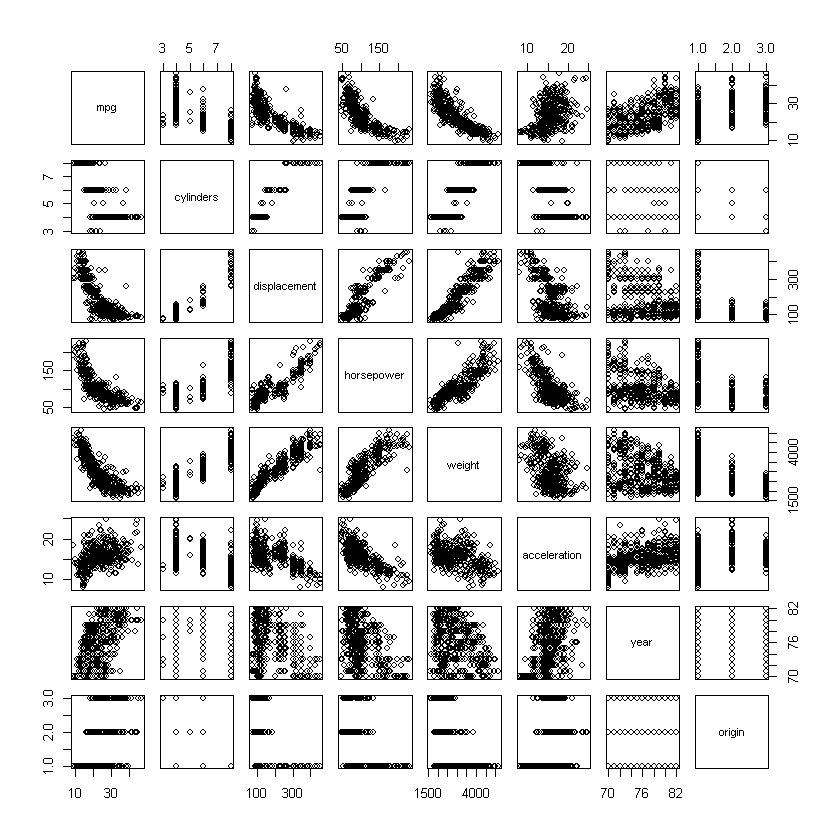

In [4]:
pairs(mpg[,1:8])

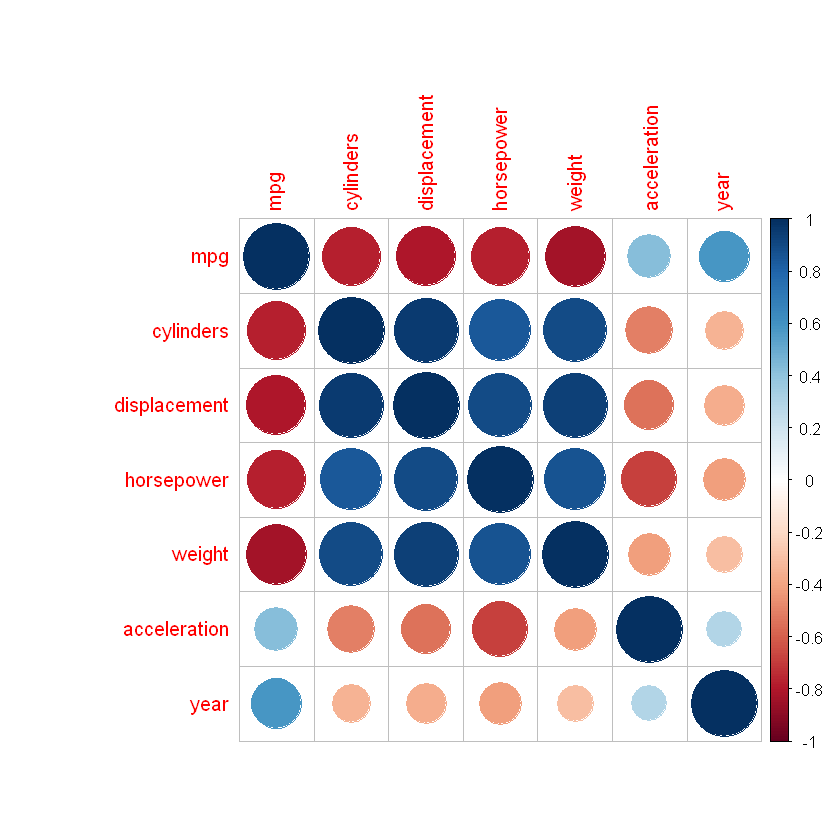

In [8]:
corrplot::corrplot(cor(na.omit(mpg[,1:7])))